# EXPLORATION_05

## 프로젝트 : 나랑 닮은 연예인을 찾아보자

In [2]:
import os

import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import face_recognition
import numpy as np
from PIL import Image
import cv2

plt.rcParams['font.family'] = 'NanumGothic'

## 연예인 사진 파일 가져오기

In [3]:
dir_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity'
file_list = os.listdir(dir_path)
file_list

['하정우.jpg',
 '손예진.jpeg',
 '효정.jpg',
 '온앤오프라운.jpg',
 '최민식.jpg',
 '목진화.png',
 '신비.jpg',
 '태연.jpg',
 '윤도현.png',
 '주진모(올드).jpg',
 '류진.jpg',
 '지코.jpg',
 '이진호.jpeg',
 '김구라.jpg',
 '조원희.jpg',
 '로제.jpg',
 '이말년.png',
 '오재원.jpg',
 '꽈두룹.jpeg',
 '최양락.jpg',
 '김상호.png',
 '카이.jpg',
 '이광수.jpg',
 '유희열.jpeg',
 '백현.jpg',
 '마동석.jpeg',
 '박해일.jpeg',
 '최현석.jpg',
 '김연우.jpeg',
 '강미나.jpg',
 '김남주.jpeg',
 '무라니시.png',
 '손진아2.jpg',
 '세훈.jpg',
 '잭 블랙.jpeg',
 '제이크 질렌할.jpeg',
 '이민호.jpeg',
 '김C.jpeg',
 '크리스 햄스워스.jpg',
 '이용진.jpg',
 '박찬호.jpg',
 '사쿠라.jpg',
 '미미.jpg',
 '권현빈.jpg',
 '정수빈.jpg',
 '김종서.jpg',
 '김고은.jpeg',
 '박항서.jpg',
 '박보검.jpg',
 '장원준.jpeg',
 '박진영.jpg',
 '아이즈원민주.jpg',
 '봉준호.jpg',
 '온앤오프와이엇.jpg',
 '아이린.jpeg',
 '케이.jpg',
 '진.jpg',
 '첸.jpg',
 '김래원.jpeg',
 '제이홉.jpg',
 '아린.jpg',
 '배성재.jpg',
 '리아.jpg',
 '잇지유나.jpg',
 '잭 니콜슨.jpeg',
 '벤 에플렉.jpeg',
 '클린트 이스트우드.jpg',
 '트와이스사나.jpg',
 '이종석.jpeg',
 'b1a4진영.jpeg',
 '이재용.jpg',
 '박희순.jpg',
 '김희철.jpg',
 '대도서관.jpeg',
 '크리스탈.jpg',
 '이제훈.jpeg',
 '이대형.jpg',
 '박휘순.jpg',
 '온앤오프효진.jpg',


## 얼굴 이미지만 정확히 가져오기

In [4]:
def get_cropped_face(image_file):

    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
        
    try:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        return cropped_face
    
    except:    # 예외가 발생했을 때 실행됨
        return []

## 자른 이미지를 PIL Image로 변환한 뒤에 저장

In [5]:
path_to_save=os.getenv('HOME')+'/aiffel/face_embedding/crop_images'
def save_cropped_face(dir_path,path_to_save):
    file_list = os.listdir(dir_path)
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue
        pillow_image = Image.fromarray(face)
        pillow_image_path = os.path.join(path_to_save, file)
        pillow_image.save(pillow_image_path)
        
save_cropped_face(dir_path,path_to_save)

### 🧐내 얼굴 사진으로 get_cropped_face 함수 실행해보기

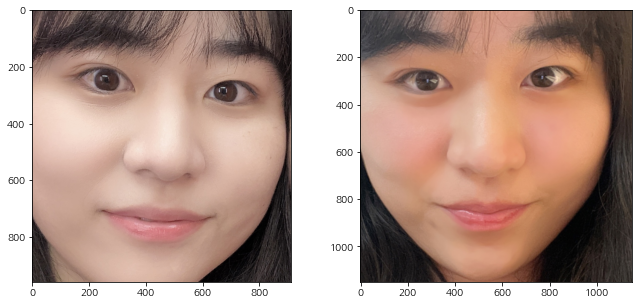

In [6]:
진아1_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/손진아1.jpg'
진아2_path = os.getenv('HOME')+'/aiffel/face_embedding/celebrity/손진아2.jpg'

진아1cropped_face = get_cropped_face(진아1_path)
진아2cropped_face = get_cropped_face(진아2_path)

f,ax=plt.subplots(1,2,figsize=(11,5))

ax[0].imshow(진아1cropped_face)
ax[1].imshow(진아2cropped_face)

## 이미지에서 얼굴 임베딩을 추출

In [8]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

### 🧐내 얼굴 사진으로 get_face_embedding 함수 실행해보기

In [9]:
embedding1 = get_face_embedding(진아1cropped_face)  
embedding2 = get_face_embedding(진아2cropped_face)  
print(embedding1)
embedding2 

[array([-5.58776110e-02,  7.01156333e-02, -2.40076948e-02, -7.83494636e-02,
       -1.31750509e-01, -3.55649218e-02, -9.29512233e-02, -8.07233527e-02,
        1.32031739e-01, -6.14408813e-02,  1.66482776e-01, -1.06443249e-01,
       -1.90139443e-01, -5.04249372e-02, -8.39048177e-02,  2.19086424e-01,
       -1.67276859e-01, -1.55612916e-01, -5.96469641e-02,  4.56258282e-02,
        1.01206496e-01, -1.12662883e-02,  3.36678699e-02,  9.27444100e-02,
       -1.07473798e-01, -3.06384087e-01, -9.74211022e-02, -8.62734690e-02,
       -7.91217089e-02, -5.76072671e-02, -1.18741393e-02,  1.04681663e-01,
       -1.73024803e-01, -5.37831597e-02,  9.43003595e-02,  7.76857659e-02,
        8.83663259e-03, -8.68302733e-02,  1.79724947e-01, -3.37769017e-02,
       -2.87775487e-01,  8.54489952e-02,  1.39859349e-01,  2.10170090e-01,
        1.63859561e-01,  3.94717883e-03,  1.10098328e-02, -1.75134540e-01,
        1.31298244e-01, -1.54503763e-01,  6.01799227e-02,  1.77403405e-01,
        5.64649180e-02, 

[array([-0.03169289,  0.06680298, -0.01312906, -0.10499578, -0.09921924,
        -0.04887278, -0.05766155, -0.07083315,  0.16698465, -0.07992585,
         0.18357626, -0.11941738, -0.18768664, -0.04354122, -0.07221269,
         0.22117496, -0.1589004 , -0.13129178, -0.07683937,  0.06355003,
         0.09060568,  0.0161913 ,  0.00717886,  0.08630226, -0.10448232,
        -0.29928172, -0.09242003, -0.0560182 , -0.06316848, -0.04952254,
         0.00631843,  0.10398873, -0.18851171, -0.06804979,  0.0996225 ,
         0.08433164, -0.0191102 , -0.09928739,  0.16281125, -0.00514018,
        -0.29667652,  0.0797151 ,  0.11625373,  0.20675868,  0.12881762,
         0.0360021 ,  0.02637886, -0.21954511,  0.12886029, -0.18954776,
         0.02766631,  0.14229134,  0.05367756,  0.03692771,  0.04283145,
        -0.13052972,  0.08430962,  0.12518306, -0.14428562, -0.00137836,
         0.11439326,  0.00518851, -0.04288093, -0.15828703,  0.23578933,
         0.0842101 , -0.14928794, -0.19698167,  0.1

## 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수 만들기

In [10]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
        
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue
        
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
          
    return embedding_dict

In [11]:
embedding_dict = get_face_embedding_dict(dir_path)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


## 얼굴임베딩 사이의 거리측정

In [12]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

In [13]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

## 나와 임베딩 거리가 가까운 순으로 정렬

In [14]:
def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+2):
        if i == 0  :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if i == 1  :   # 손진아2가 나오므로 제외시킴
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i-1, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
    return sorted_faces, sort_key_func

### 🧐 나와 닮은 연예인 Best 5

In [15]:
sorted_faces, key = get_nearest_face('손진아1')

순위 1 : 이름(온앤오프효진), 거리(0.3824365456201115)
순위 2 : 이름(온앤오프라운), 거리(0.3882126326062813)
순위 3 : 이름(비니), 거리(0.4014332628001252)
순위 4 : 이름(아이즈원민주), 거리(0.4065062300558613)
순위 5 : 이름(사쿠라), 거리(0.4089569997671894)


### 🧐 나의 사진 파일 사이의 임베딩 벡터 거리 구하기

In [16]:
get_distance('손진아1', '손진아2')

0.24256678067794235

## 시각화

### PIL Image로 변환한 뒤에 저장한 cropped 사진을 저장 경로에서 불러오기

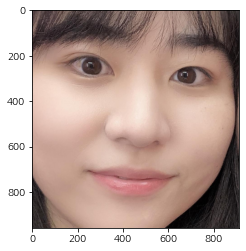

In [17]:
my_img = cv2.imread(path_to_save + '/손진아1.jpg')
plt.imshow(cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB) )
plt.show()

### 나와 닮은 연예인 Top 5 보기

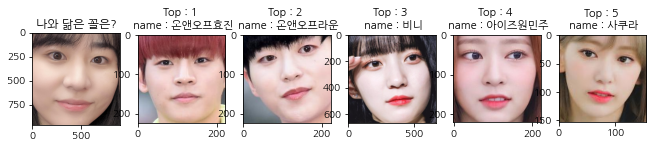

In [18]:
f,ax=plt.subplots(1,6,figsize=(11,5))
img = cv2.imread(path_to_save + '/손진아1.jpg')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
title = '나와 닮은 꼴은?'
ax[0].set_title(title)


ax[0].imshow(img)
for i in range(2,7):
    my_img = cv2.imread(path_to_save + '/' + sorted_faces[i][0]+'.jpg')
    my_img=cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB)
    title = 'Top : {} \n name : {}'.format(i-1, sorted_faces[i][0])
    ax[i-1].set_title(title,fontsize=11)
    
    ax[i-1].imshow(my_img)    

### 닮은꼴 찾기 어플처럼 시각화해보기

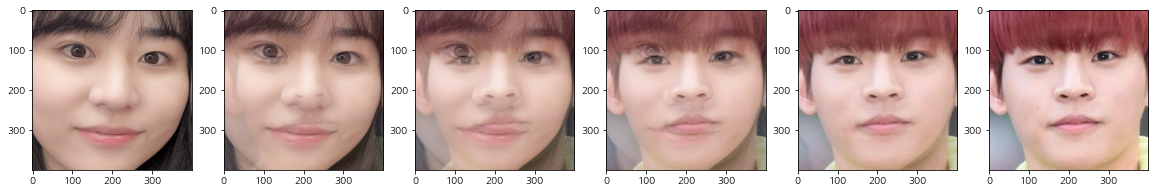

In [19]:
img1 = cv2.imread(path_to_save + '/손진아1.jpg')
img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1,(400,400))
img2 = cv2.imread(path_to_save + '/온앤오프효진.jpg')
img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(400,400))

f,ax=plt.subplots(1,6,figsize=(20,5))

for i in range(7):
    a=1.0
    k=0
    while(k<6):
        mix = cv2.addWeighted(img1, a,img2, 1.0-a, 0)
        ax[k].imshow(mix)
        a-=0.2
        k+=1

***

## 회고

* 얼굴 인식하는 단계에서 다음과 같은 에러가 생겼다.
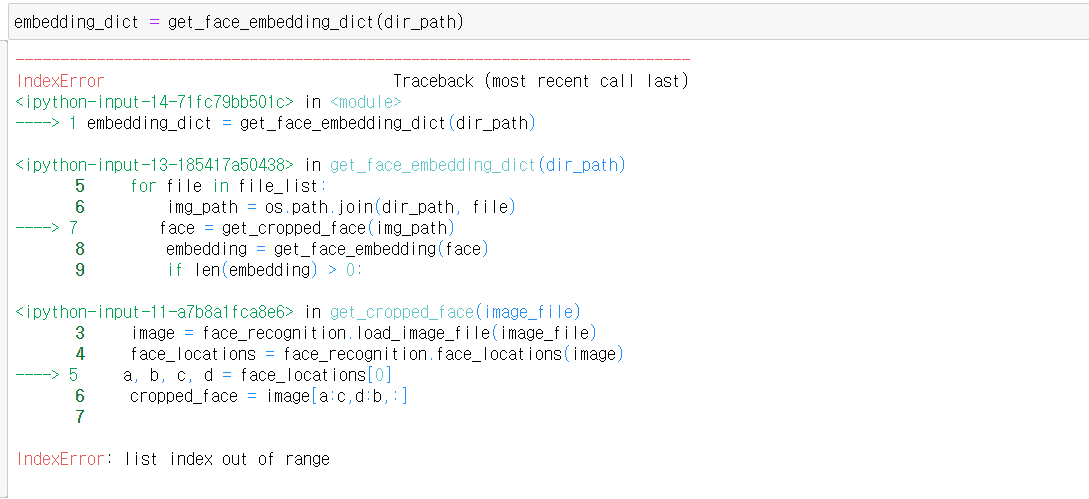

얼굴 인식이 안 되는 사진이 존재하여 생기는 오류이므로 이런 경우엔 아래의 코드처럼  예외처리를 하는 코드를 만들었다.

def get_cropped_face(image_file):

    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
        
    try:
        a, b, c, d = face_locations[0]
        cropped_face = image[a:c,d:b,:]
        return cropped_face
    
    except:    # 예외가 발생했을 때 실행됨
        return []
        

def get_face_embedding_dict(dir_path):
           
           .
           .
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if face == []:
            continue  # 예외처리
            .
            .
            


* 고양이수염달기에서 사용했던 cv2.addWeighted함수를 적용하여 실제 닮은 꼴 찾기 어플에서 나오는 형식으로 시각화를 해보았다. 자기 얼굴 사진에서 시작하여 점점 닮은 꼴의 사진으로 바뀌는 형식..
* matplotlib에서 한글이 깨져서 나왔다 => plt.rcParams['font.family'] = 'NanumGothic'를 사용하여 한글폰트를 설정해주었다.
* 내 얼굴 사진파일을 두개 넣었는데 이 둘 사이의 임베딩 거리가 가장 가까웠다. 그래서 성능이 꽤 괜찮구나라고 생각했다. 하지만 닮은 꼴 best5를 봤을 때 1위보다는 2위랑 더 닮은 것 같다는 개인적인 생각..